## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = ("./Resources/Mouse_metadata.csv")
study_results_path = ("./Resources/Study_results.csv")

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_complete_df = pd.merge(mouse_metadata, study_results, on = "Mouse ID")

# Display the data table for preview
mouse_complete_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
num_mouse = len(mouse_complete_df["Mouse ID"].unique())
num_mouse

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_complete_duplicated =mouse_complete_df.duplicated(subset=["Mouse ID", "Timepoint"])
mouse_complete_duplicated.sum()

5

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
all_duplicate = mouse_complete_df[mouse_complete_df.duplicated(subset = ["Mouse ID", "Timepoint"])]
all_duplicate

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = mouse_complete_df.drop_duplicates(subset = ["Mouse ID","Timepoint"])
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
nr_mouse = len(clean_data["Mouse ID"].unique())
nr_mouse

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
data_group = clean_data.groupby(["Drug Regimen"])

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean = data_group.mean()["Tumor Volume (mm3)"]
median = data_group.median()["Tumor Volume (mm3)"]
var = data_group.var()["Tumor Volume (mm3)"]
std = data_group.std()["Tumor Volume (mm3)"]
sem = data_group.sem()["Tumor Volume (mm3)"]

# Assemble the resulting series into a single summary dataframe.
final_statistic = pd.DataFrame({"Mean":mean,
                                "Median":median,
                                "Variance (Var)":var,
                                "Standard Deviation":std,
                                "Standard Error of Mean (SEM)":sem
                               })
final_statistic

,Mean,Median,Variance (Var),Standard Deviation,Standard Error of Mean (SEM)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
aggregate_data = data_group.agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
aggregate_data

# Using the aggregation method, produce the same summary statistics in a single line


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

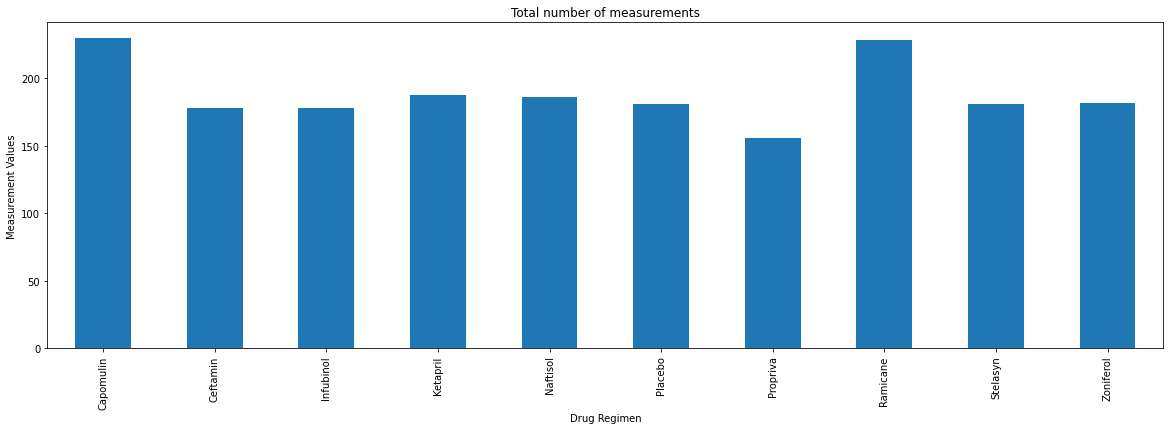

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
total_measurements = data_group.count()["Mouse ID"]
total_measurements.plot(kind = "bar", figsize=(20,6))
plt.ylabel("Measurement Values")
plt.title("Total number of measurements")
plt.show()

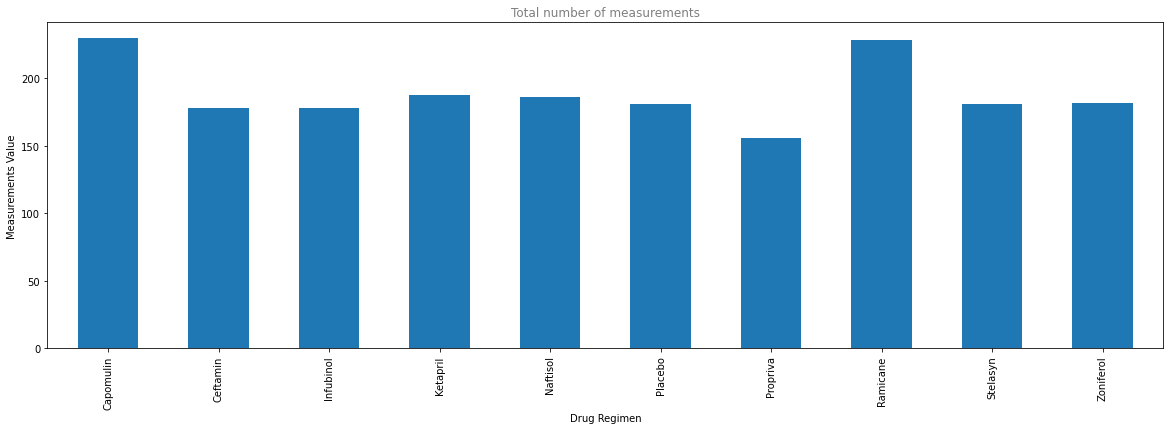

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
drugs = [x for x in data_group.indices.keys()]
measurements = [x for x in total_measurements]
plt.figure(figsize=(20,6))
plot = plt.bar(drugs, measurements, width =0.55)
plt.title("Total number of measurements",alpha=0.5)
plt.xlabel("Drug Regimen")
plt.ylabel("Measurements Value")
plt.xlim(-0.55, len(drugs)-0.45)
plt.xticks(rotation = 90)
plt.show()
# # plt.tight_layout()

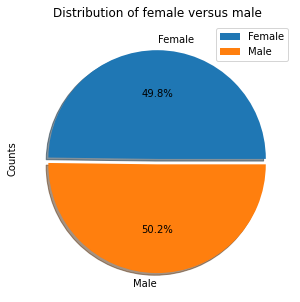

In [22]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender = clean_data.groupby(["Sex","Mouse ID"])
mouse_gender = pd.DataFrame(gender.size())
mouse_gender_df = pd.DataFrame(mouse_gender.groupby("Sex").count())
mouse_gender_df.columns = ["Counts"]
mouse_gender_df.plot(kind = "pie",y = "Counts", title = "Distribution of female versus male", autopct="%1.1f%%",
                    figsize=(5,5), explode=(0,0.05), shadow =True)
plt.show()

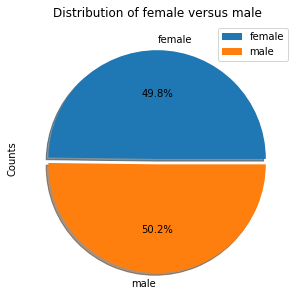

In [29]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender = ["female","male"]
counts = list(mouse_gender_df["Counts"])
plt.figure(figsize=(5,5))
plt.pie(counts, labels = gender, autopct="%1.1f%%", explode=(0,0.05), shadow =True)
plt.title("Distribution of female versus male")
plt.ylabel("Counts")
plt.legend()
plt.show()

## Quartiles, Outliers and Boxplots

In [34]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
regimen = ["Capomulin","Ramicane", "Infubinol", "Ceftamin"]

# Capomulin, Ramicane, Infubinol, and Ceftamin
reg_4 = clean_data[clean_data["Drug Regimen"].isin(regimen)]
# Start by getting the last (greatest) timepoint for each mouse
reg_group = reg_4.groupby(["Drug Regimen", "Mouse ID"]).last()["Timepoint"]
reg_group = reg_group.to_frame()
reg_group

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
reg_merged = pd.merge(reg_group,clean_data, on = ["Mouse ID","Timepoint"])
reg_merged

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2
...,...,...,...,...,...,...,...,...
95,s508,45,Ramicane,Male,1,17,30.276232,0
96,u196,45,Ramicane,Male,18,25,40.667713,3
97,w678,5,Ramicane,Female,5,24,43.166373,0
98,y449,15,Ramicane,Male,19,24,44.183451,0


In [54]:
# Put treatments into a list for for loop (and later for plot labels)
regimen

# Create empty list to fill with tumor vol data (for plotting)
tumor_values = {}
tumor_list = reg_merged.groupby("Drug Regimen")["Tumor Volume (mm3)"]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for key,value in tumor_list:
    print(key)
    print()
    quartiles = value.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f"The lower quartile of Tumor Volumes for {key} is: {lowerq:.3f}")
    print(f"The upper quartile of Tumor Volumes for {key} is: {upperq:.3f}")
    print(f"The interquartile range of Tumor Volumes for {key} is: {iqr:.3f}")
    print(f"The the median of Tumor Volumes for {key} is: {quartiles[0.5]:.3f} ")
    print()
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"\tValues below {lower_bound:.3f} could be outliers.")
    print(f"\tValues above {upper_bound:.3f} could be outliers.")
    print()
    tumor_values[key] = value
    # Locate the rows which contain mice on each drug and get the tumor volumes
    drugs= clean_data.loc[clean_data["Drug Regimen"] == key] 
    the_values = drugs["Tumor Volume (mm3)"]
    outliers = the_values.loc[(the_values < lower_bound) | (the_values > upper_bound)]
    if outliers.any():
        print(f"Outlier found for {key}: {list(outliers)[0]:.3f}")
        
        # Find the mouse ID based on outlier
        mouse_id = clean_data.loc[clean_data["Tumor Volume (mm3)"] == list(outliers)[0]]
        mouse_id  = list(mouse_id["Mouse ID"])[0]
        print(f"The outliers mouse id is {mouse_id}")
        print()
    # add subset 
    # I am adding everthing in the dictionary
    
    # Determine outliers using upper and lower bounds
    

Capomulin

The lower quartile of Tumor Volumes for Capomulin is: 32.377
The upper quartile of Tumor Volumes for Capomulin is: 40.159
The interquartile range of Tumor Volumes for Capomulin is: 7.782
The the median of Tumor Volumes for Capomulin is: 38.125 

	Values below 20.705 could be outliers.
	Values above 51.832 could be outliers.

Ceftamin

The lower quartile of Tumor Volumes for Ceftamin is: 48.722
The upper quartile of Tumor Volumes for Ceftamin is: 64.300
The interquartile range of Tumor Volumes for Ceftamin is: 15.578
The the median of Tumor Volumes for Ceftamin is: 59.852 

	Values below 25.355 could be outliers.
	Values above 87.666 could be outliers.

Infubinol

The lower quartile of Tumor Volumes for Infubinol is: 54.049
The upper quartile of Tumor Volumes for Infubinol is: 65.526
The interquartile range of Tumor Volumes for Infubinol is: 11.477
The the median of Tumor Volumes for Infubinol is: 60.165 

	Values below 36.833 could be outliers.
	Values above 82.741 could be 

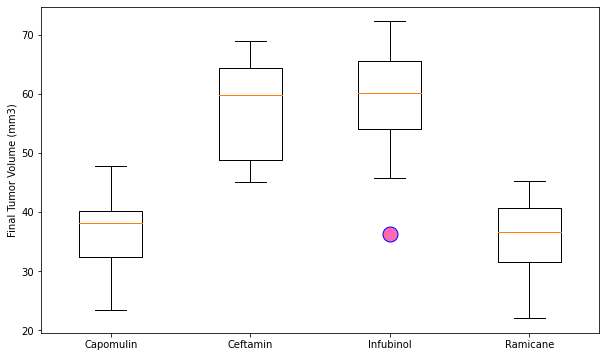

In [71]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
labels = [key for key in tumor_values]
values = [value for value in tumor_values.values()]
plt.figure(figsize=(10,6))
flierprops = dict(marker='o', markerfacecolor='hotpink', markersize=15,
                  linestyle='none', markeredgecolor='b')
plt.boxplot(values, labels = labels, flierprops = flierprops)
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
